# Segundo Seguimiento Física Computacional:

#### - Tomas Sosa Giraldo
#### - David García Gómez


## Puntos 1, 2:

A continuación se plantea el juego de la vida de Conway, en el cual se simula la evolución de células de dos especies en un tablero de 50x50. Las células pueden estar vivas o muertas. Las reglas se especifican en el archivo README.md. Ha de aclararse que en las reglas se modificaron algunos parámetros, en comparación del juego básico original, con el objetivo de que las células compitieran entre sí.

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

def new_board(x, y, num_live_cells_A=2, num_live_cells_B=3, num_dead_cells=6):
    """Initializes a board for Conway's Game of Life"""
    
    board = []
    for i in range(0, y):
        # Defaults to a 3:2 dead cell:live cell ratio
        board.append([random.choice([0] * num_dead_cells + [1] * num_live_cells_A + [2] * num_live_cells_B) for _ in range(0, x)])
    return board


def get(board, x, y):
    """Return the value at location (x, y) on a board, wrapping around if out-of-bounds"""
    return board[y % len(board)][x % len(board[0])]


def assign(board, x, y, value):
    """Assigns a value at location (x, y) on a board, wrapping around if out-of-bounds"""
    board[y % len(board)][x % len(board[0])] = value


def count_neighbors(board, x, y):
    """Counts the number of living neighbors a cell at (x, y) on a board has"""
    neighbors = [get(board, x - 1, y),
                get(board, x + 1, y),
                get(board, x, y - 1),
                get(board, x, y + 1),
                get(board, x + 1, y + 1),
                get(board, x + 1, y - 1),
                get(board, x - 1, y + 1),
                get(board, x - 1, y - 1)]
    num_A = 0
    num_B = 0
    for i in neighbors:
      if i == 1:
        num_A+=1
      elif i == 2:
        num_B+=1

    return num_A, num_B


def process_life(board):
    """Creates the next iteration from a passed state of Conway's Game of Life"""
    next_board = new_board(len(board[0]), len(board))
    for y in range(0, len(board)):
        for x in range(0, len(board[y])):
            num_neighbors_A, num_neighbors_B = count_neighbors(board, x, y)
            is_alive_A = get(board, x, y) == 1
            is_alive_B = get(board, x, y) == 2

            # Survive
            if is_alive_A and 2 <= num_neighbors_A <= 3 and num_neighbors_B <=2:
                assign(next_board, x, y, 1)
            elif is_alive_B and 2 <= num_neighbors_B <= 3 and num_neighbors_A <=2:
                assign(next_board, x, y, 2)

            # Dead
            elif is_alive_A and (num_neighbors_A > 3 or num_neighbors_A < 2 or num_neighbors_B > 2):
                assign(next_board, x, y, 0)
            elif is_alive_B and (num_neighbors_B > 3 or num_neighbors_B < 2 or num_neighbors_A > 2):
                assign(next_board, x, y, 0)

            # Born
            elif not is_alive_A and num_neighbors_A == 3 and num_neighbors_B <=2:
                assign(next_board, x, y, 1)
            elif not is_alive_B and num_neighbors_B == 3 and num_neighbors_A <=2:
                assign(next_board, x, y, 2)
            else:
                assign(next_board, x, y, 0)
    return next_board

En la siguiente celda de código se presenta la simulación del juego de la vida de Conway. Se simulan 100 juegos de la vida, cada uno con 1000 iteraciones. Se recolectan los datos de cada juego.

In [2]:
from IPython.display import clear_output
import time

def draw_board(board):
    res = ''
    nA = 0
    nB = 0
    for row in board:
        for col in row:
            if col == 1:
                res += '* '
                nA += 1
            elif col == 2:
                res += '$ '
                nB += 1
            else:
                res += '  '
        res += '\n'
    return res, nA, nB

np.random.seed(10)
num_A = []
num_B = []
n=100
for i in range(n):

    board = new_board(50, 50)
    board1=new_board(50,50)
    board2=new_board(50,50)
    board3=new_board(50,50)
    board4=new_board(50,50)
    NUM_ITERATIONS = 1000

    i=0
    while i<(NUM_ITERATIONS-1):
        print('Iteration ' + str(i + 1))
        
        board4=board3
        board3=board2
        board2=board1
        board1=board
        
        BB=[board1,board2,board3,board4]
        
        
        board = process_life(board)
        
        
        
        if board==BB[0]:
            break
        if board==BB[1]:
            break
        if board==BB[2]:
            break
        if board==BB[3]:
            break

        res, nA, nB = draw_board(board)
        num_A.append(nA)
        num_B.append(nB)
        print(res)
        #time.sleep(0.1)
        clear_output(wait=True)
        i+=1

    res, nA, nB = draw_board(board)
    num_A.append(nA)
    num_B.append(nB)
    print(res)

num_A=np.array(num_A)
num_B=np.array(num_B)

Iteration 290
                                                                            $ $                     
                                                              * * *       $   $                     
                                                                            $                       
                                                                                                    
                                                                                                    
                                                                                                    
                                                            $           $ $                         
                                                            $   * *     $   $                       
                                                            $   * *       $                         
                        $ $ $       $ $ $                                    

## Puntos 3, 4:

Una vez recolectados los datos, se realiza un histograma 2d normalizado con los datos obtenidos de el número de células a y número de células b.

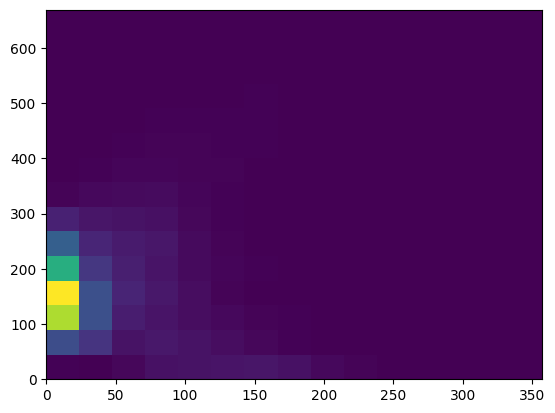

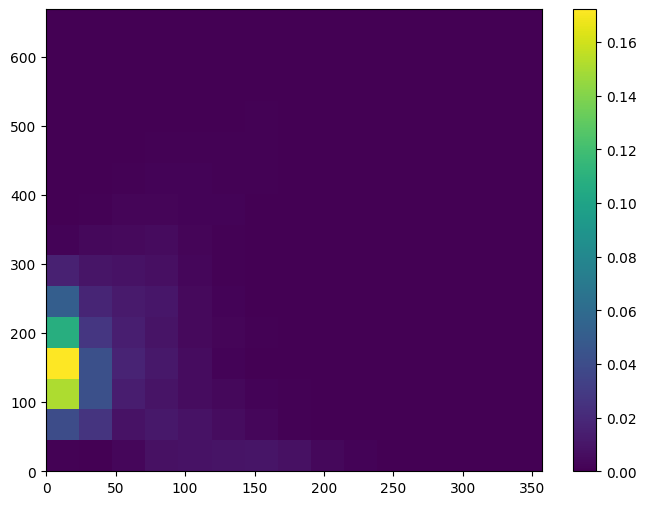

In [28]:
# Histograma
A,x_edges,y_edges,_=plt.hist2d(num_A,num_B,bins=15)

# Normalizando el histograma
norm = A.sum()
A_normalized = A / norm

# Mosrtar el histograma normalizado
plt.figure(figsize=(8, 6))
plt.imshow(np.transpose(A_normalized), aspect='auto', cmap='viridis', origin='lower',
           extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
plt.colorbar()
plt.savefig('Plots/Hist2D')

## Punto 5, 6:

Notese que el histograma normalizado nos sirve como función de distribución de probabilidad. Para ello, definimos entonces esta función:

In [18]:
def prob_d(x,y):
    Xi=0
    Yi=0
    for i in range(len(x_edges)):
        if x_edges[i]<x<x_edges[i+1]:
            Xi=i
    for i in range(len(y_edges)):
        if y_edges[i]<y<y_edges[i+1]:
            Yi=i
    return (A_normalized[Xi][Yi])

A continuación usamos el algoritmo de metrópolis 2D para generar datos con la distribución de probabilidad que definimos anteriormente. Para esto se generaron 1000 datos:

In [23]:
# Algoritmo de Metropolis 2D

phi_0 = (max(x_edges)*np.random.random(),max(y_edges)*np.random.random())

phi = [phi_0]

# Algoritmo
while len(phi)<1000:
  phi_p = (max(x_edges)*np.random.random(),max(y_edges)*np.random.random())
  d_S = -np.log(prob_d(phi_p[0],phi_p[1])/prob_d(phi[-1][0],phi[-1][1]))

  if d_S<0:
    phi.append(phi_p)

  elif d_S>0:
    x = np.random.random()

    if x<prob_d(phi_p[0],phi_p[1])/prob_d(phi[-1][0],phi[-1][1]):
      phi.append(phi_p)

    elif x>prob_d(phi_p[0],phi_p[1])/prob_d(phi[-1][0],phi[-1][1]):
      pass

C:\Users\Acer\AppData\Local\Temp\ipykernel_23532\2409645785.py:10: RuntimeWarning: divide by zero encountered in log
  d_S = -np.log(prob_d(phi_p[0],phi_p[1])/prob_d(phi[-1][0],phi[-1][1]))


Con los datos generados con el algoritmo de metrópolis, corroboramos que el histograma que genera es similar al obtenido con las iteraciones del juego de la vida:

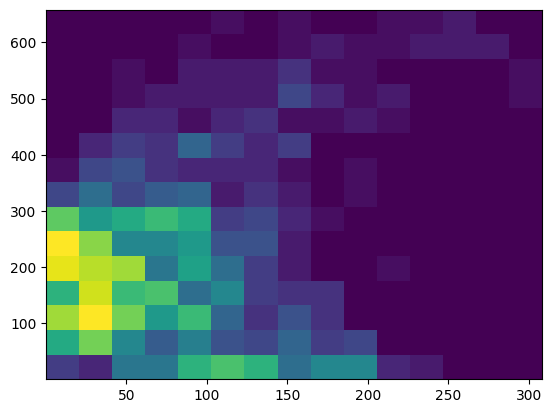

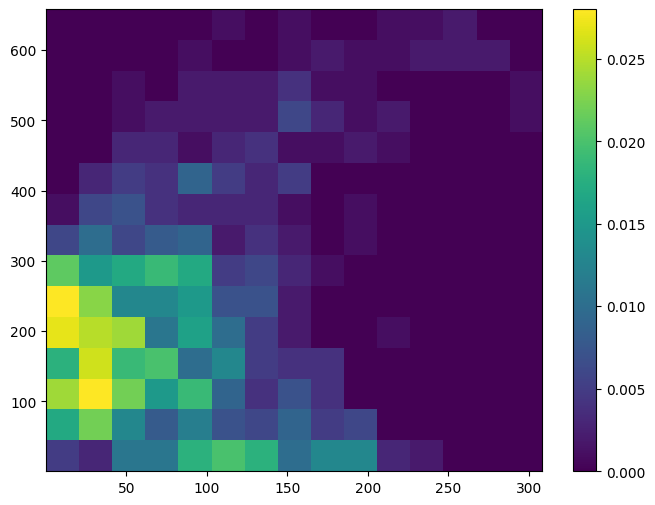

In [27]:
# Almacenamos los datos
X = [p[0] for p in phi]
Y = [p[1] for p in phi]

# Histograma
k,xk_edges,yk_edges,_=plt.hist2d(X,Y,bins=15)

# Normalizamos
k_norm = k/k.sum()

# Mosrtar el histograma normalizado
plt.figure(figsize=(8, 6))
plt.imshow(np.transpose(k_norm), aspect='auto', cmap='viridis', origin='lower',
           extent=[xk_edges[0], xk_edges[-1], yk_edges[0], yk_edges[-1]])
plt.colorbar()
plt.savefig('Plots/Metropolis2D')